 # Project 2: part 2 'Titanic'

<font face="Arial" size="+1" color="#962a09"><i>Sarah Alasaadi ,  Abeer Alshathri , Jadil Ruwayshid </i></font>

## Problem Statment:

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not

## Executive Summary:

We started this competition by focusing on getting a well understanding of the dataset. The EDA is detailed and many visualizations are included. Then we provide Seven kind of modeling in order to reach to best predections. Gradient Boosting Classifier performs best with a score of 0.78.

## Datasets Description:



|Feature | Dataset |Data type | Description |
|---|---|---|---|
|PassengerId  | train/test|integer| An unique index for passenger rows|
|Survived |train|integer| Shows if the passenger survived or not|
|Pclass |train/test|integer|Ticket class|
|Name |train/test|object|Passenger's name|
|Sex |train/test|object|Passenger's sex. It's either Male or Female. |
|Age |train/test|float|Passenger's age|
|SibSp |train/test| integer|Number of siblings or spouses travelling with each passenger.|
|Parch  |train/test|integer|Number of parents of children travelling with each passenger.|
|Ticket  |train/test| object|Ticket number |
|Fare  |train/test|float|How much money the passenger has paid for the travel journey.|
|Cabin  |train/test|object|Cabin number of the passenger.|
|Embarked |train/test| object|Port from where the particular passenger was embarked/boarded.|

## Data Import and Cleaning:

In [243]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [244]:
# read the two datasets.

test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train.tail(10)
#test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [136]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
# EDA the data by exploring the shape .
print('the shape of train',train.shape)
print('the shape of test',test.shape)

the shape of train (891, 12)
the shape of test (418, 11)


In [138]:
# explore the data type.
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# describe the data .
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# finding the null values of train .
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# finding the null values of test .
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [139]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


###  first we are going to fill the null values in each datasets .

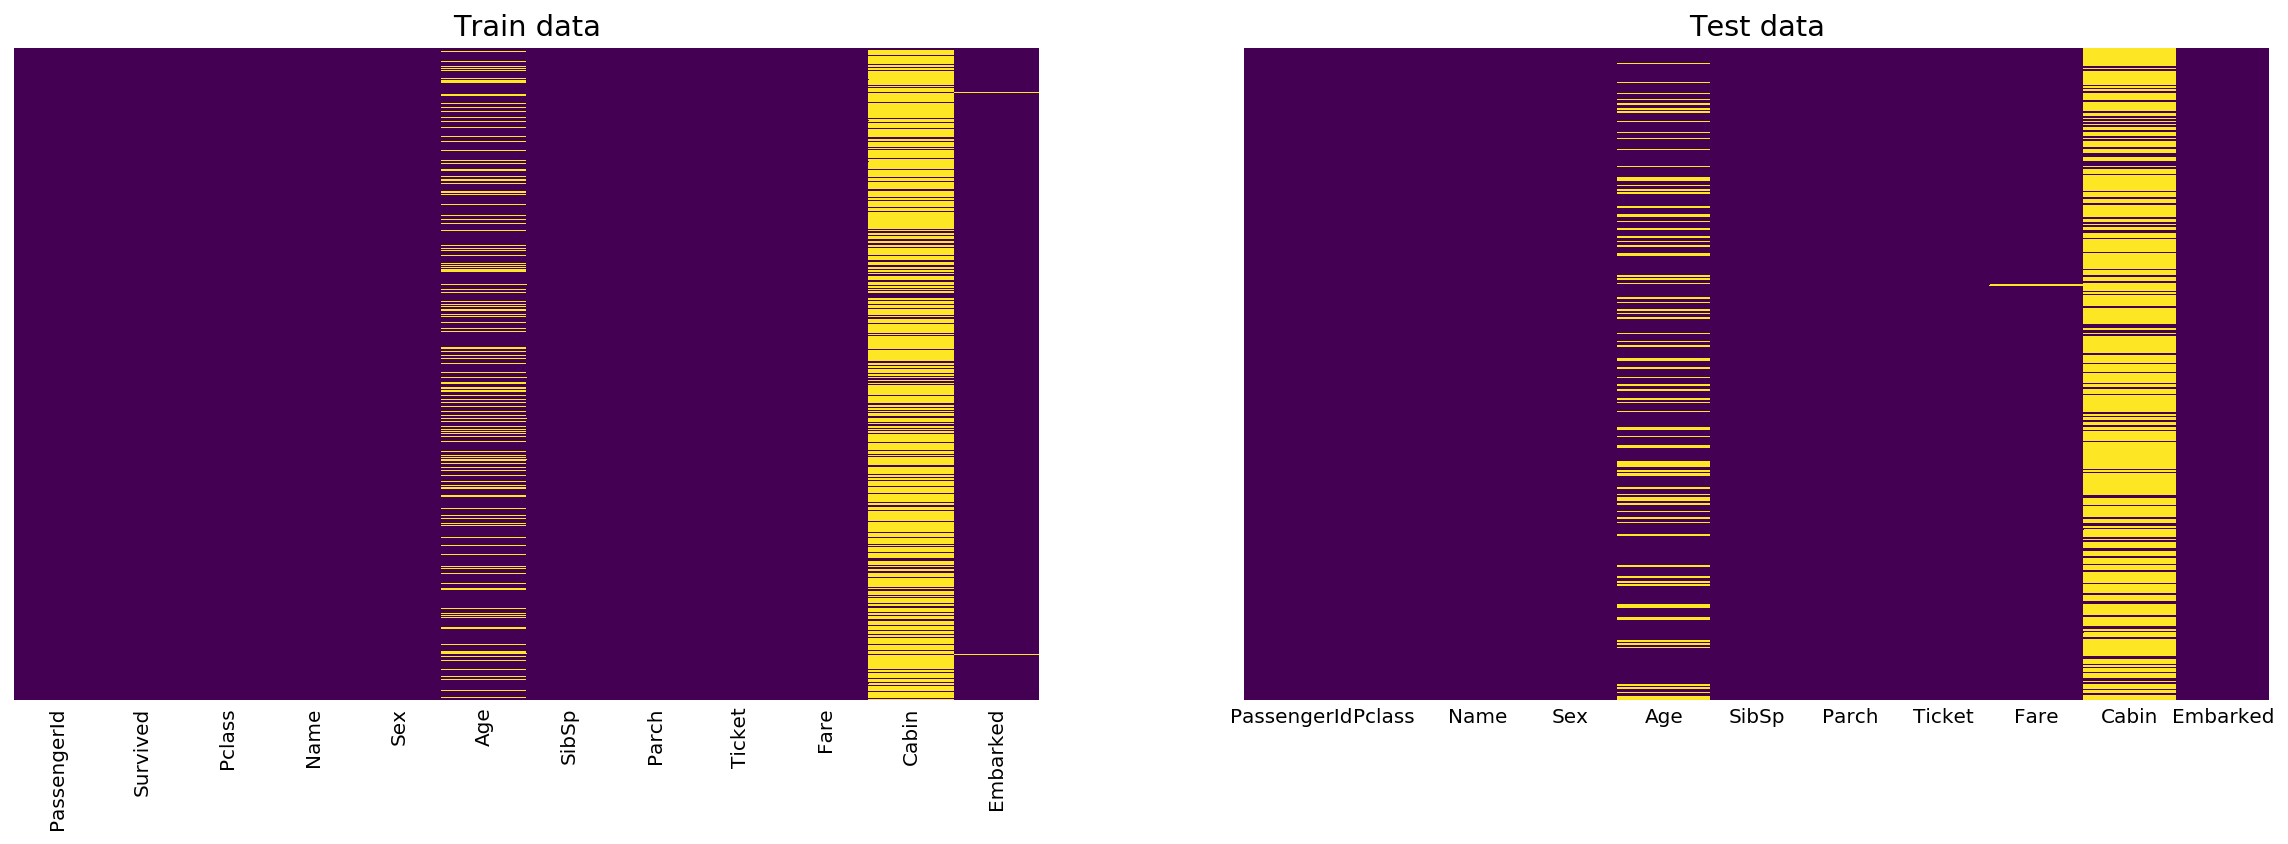

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [9]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [181]:
train.Embarked.fillna('S',inplace=True)
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [245]:
mean_fare_3 = test[test['Pclass']==3]['Fare'].mean()
print('The mean fare for the Pclass (for missing fare data) is: ',mean_fare_3)


The mean fare for the Pclass (for missing fare data) is:  12.459677880184334


In [247]:
test.Fare.fillna(mean_fare_3,inplace=True)

In [248]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [249]:
# (for train) grab age and apply the impute_age, our custom function 
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
# (for test) grab age and apply the impute_age, our custom function 
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)


In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [250]:
train['Cabin']=train['Cabin'].notnull().astype(int)

In [251]:
test['Cabin']=test['Cabin'].notnull().astype(int)

# Visualize the Data:

<b>now we visualize the data to  understand a given dataset so we used seaborn and matplotlib.</b>

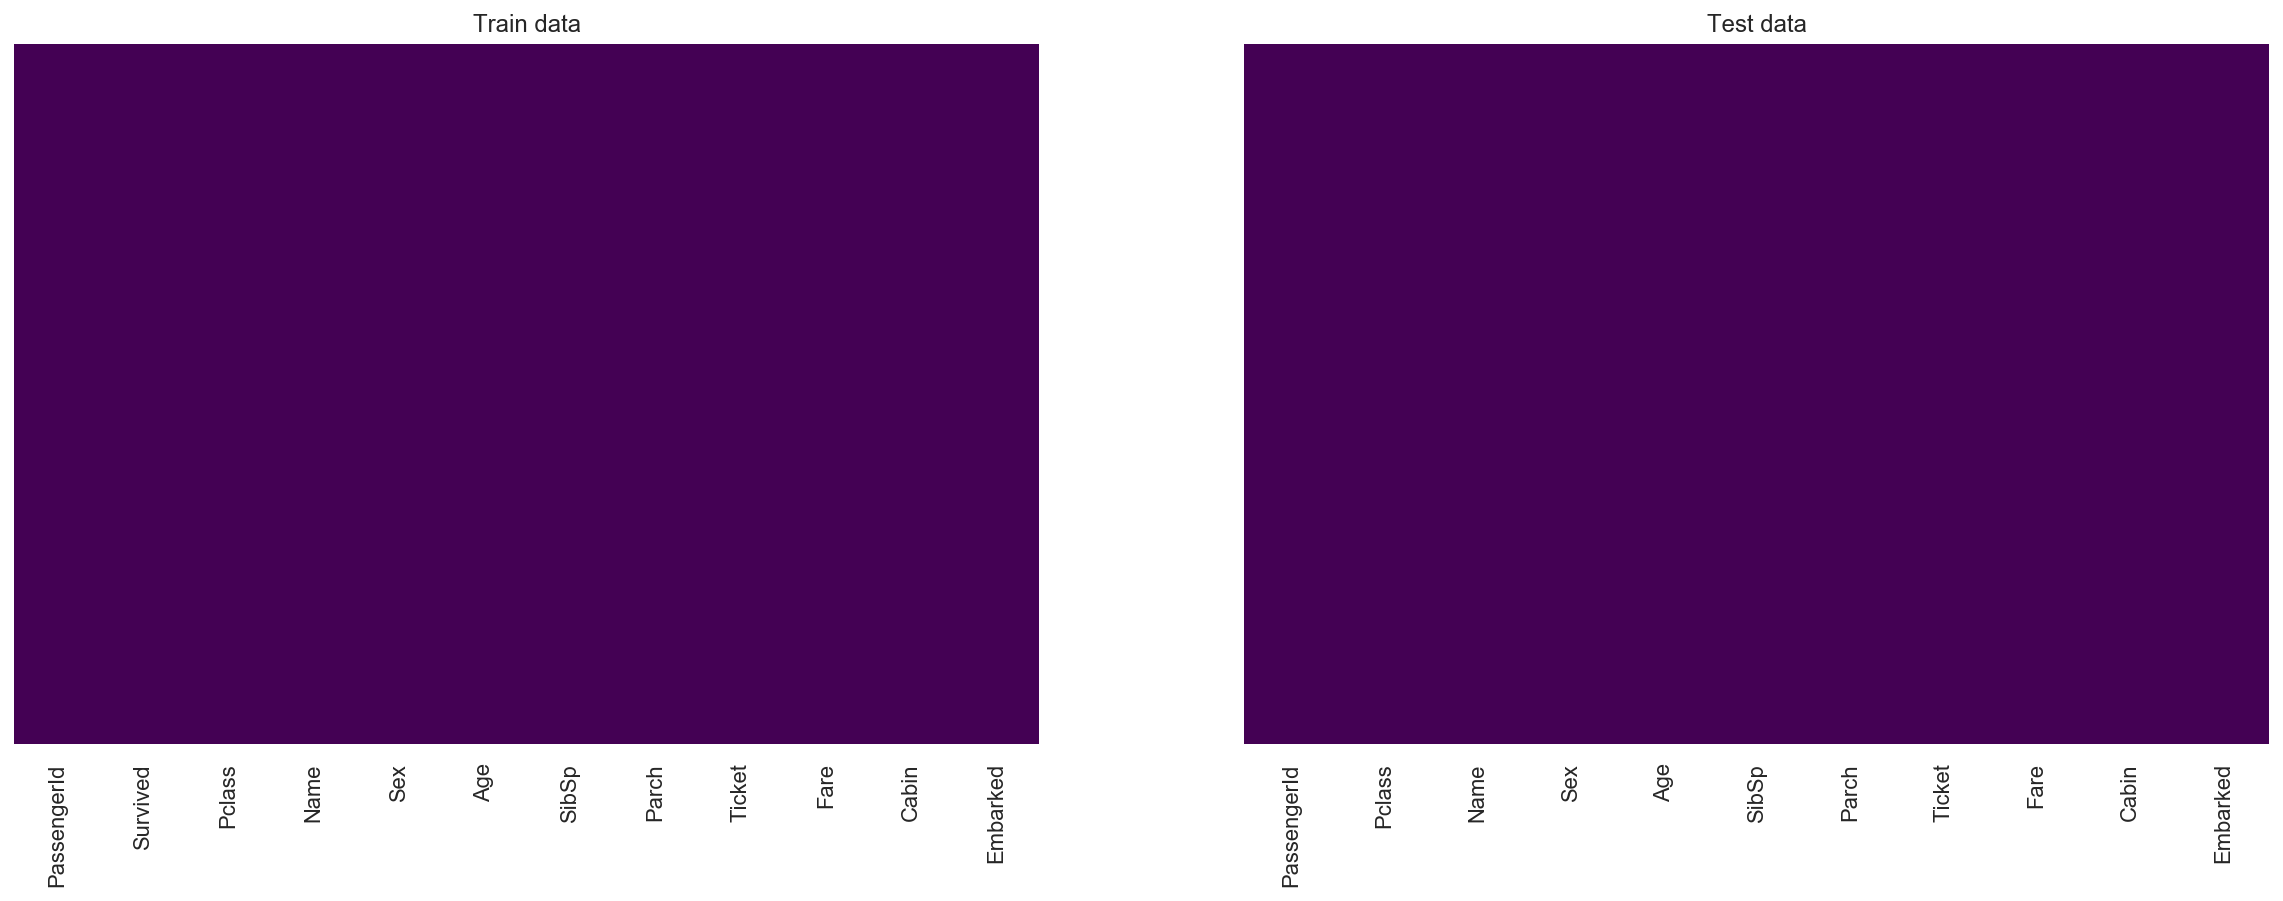

In [204]:
sns.set(style="white")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

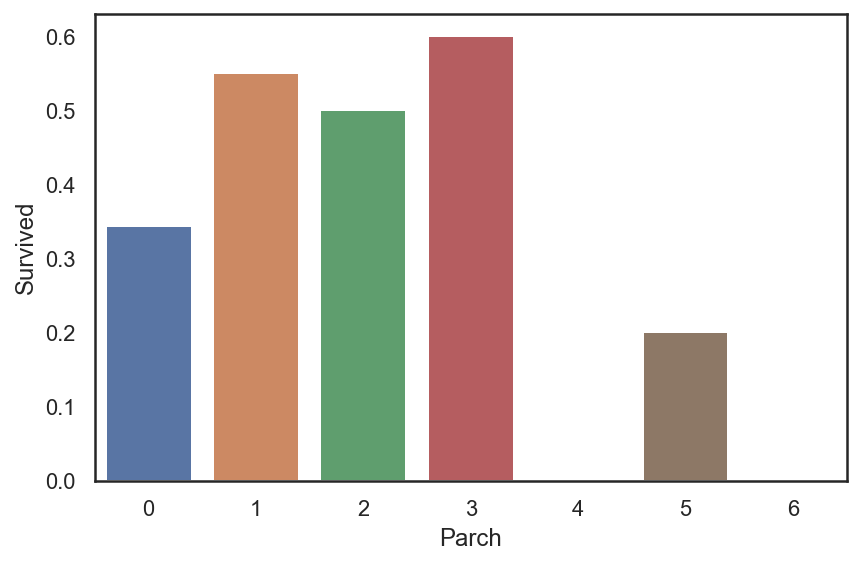

In [198]:
sns.set(style="white")
sns.barplot(x='Parch', y='Survived', ci=None, data=train)

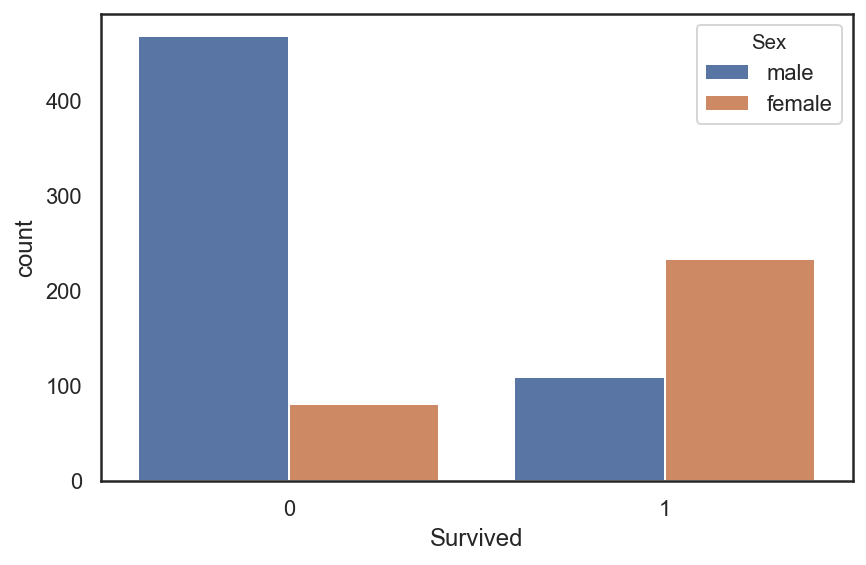

In [197]:
sns.set(style="white")
sns.countplot(x='Survived', data=train, hue='Sex')


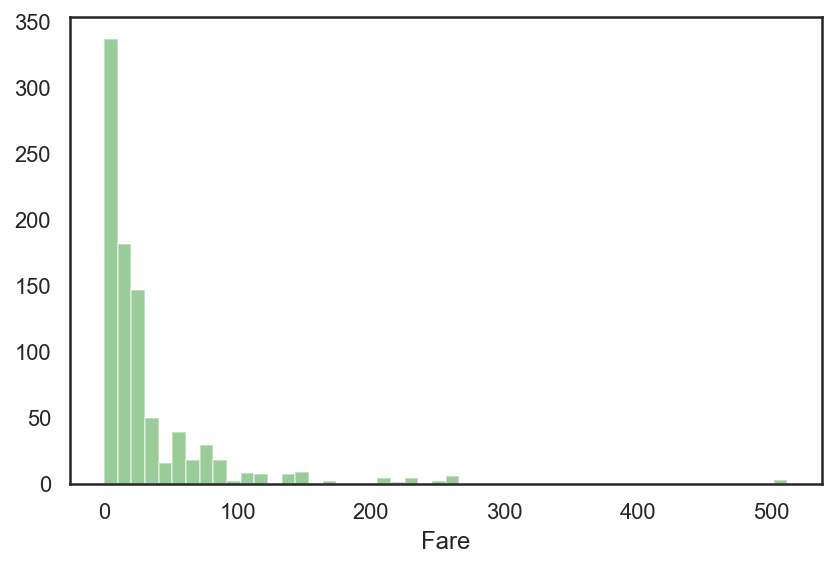

In [321]:
sns.set(style="white")
sns.distplot(train['Fare'],color='green',kde=False)

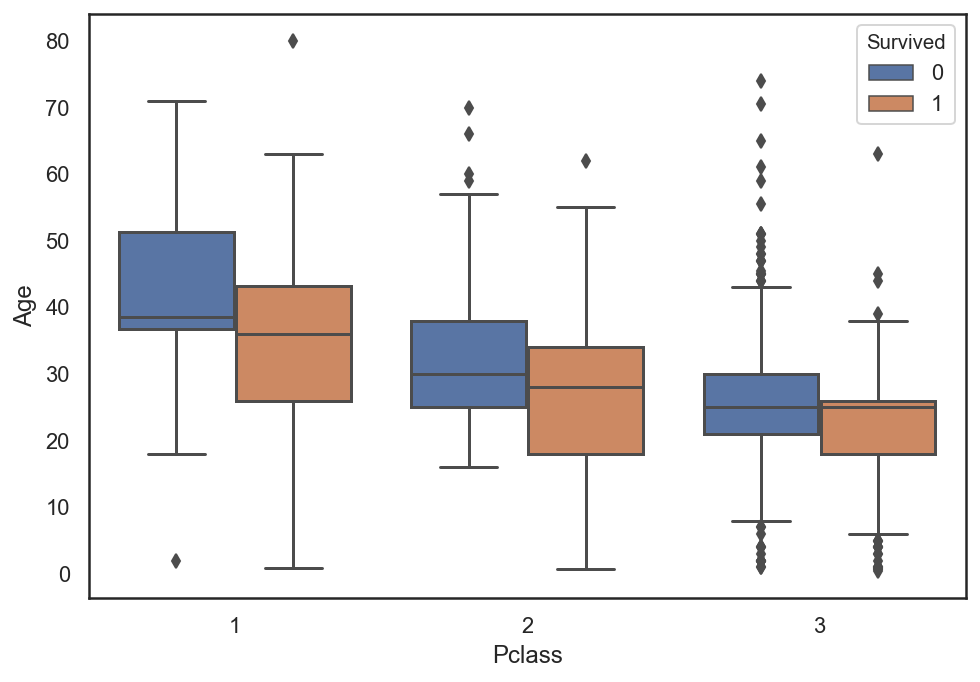

In [223]:
sns.set(style="white")
plt.figure(figsize=(7, 5))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train)

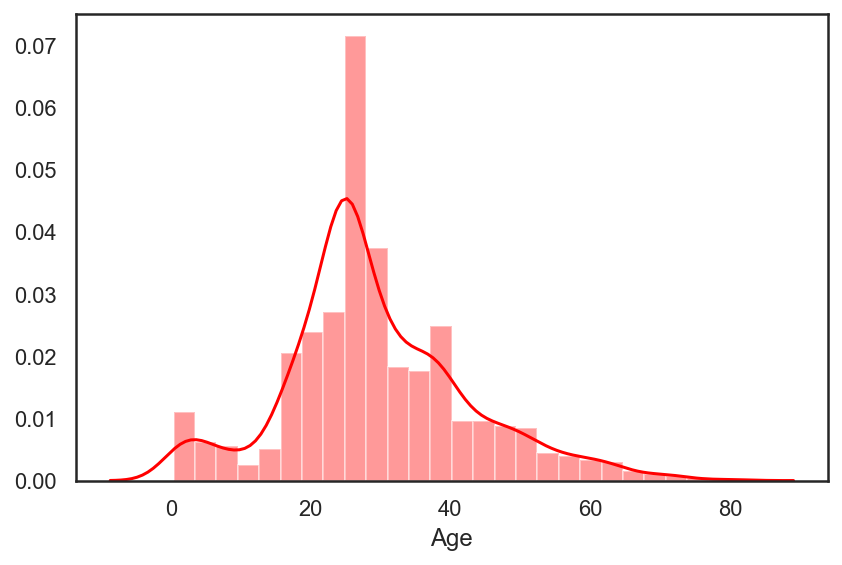

In [220]:
sns.set(style="white")
sns.distplot(train['Age'],color='red')

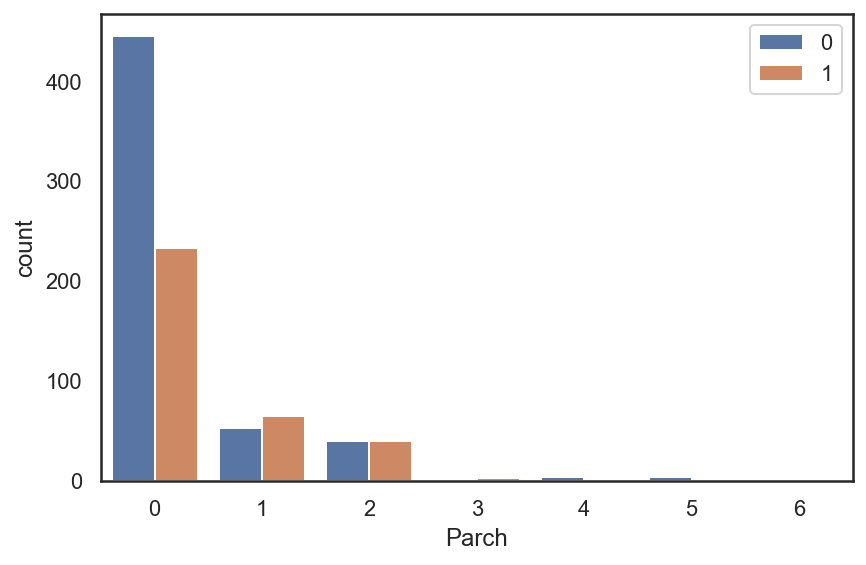

In [222]:
sns.set(style="white")
plt.figure(figsize=(6,4))
sns.countplot(x='Parch', hue='Survived', data=train)
plt.legend(bbox_to_anchor=(1,1), loc=1)

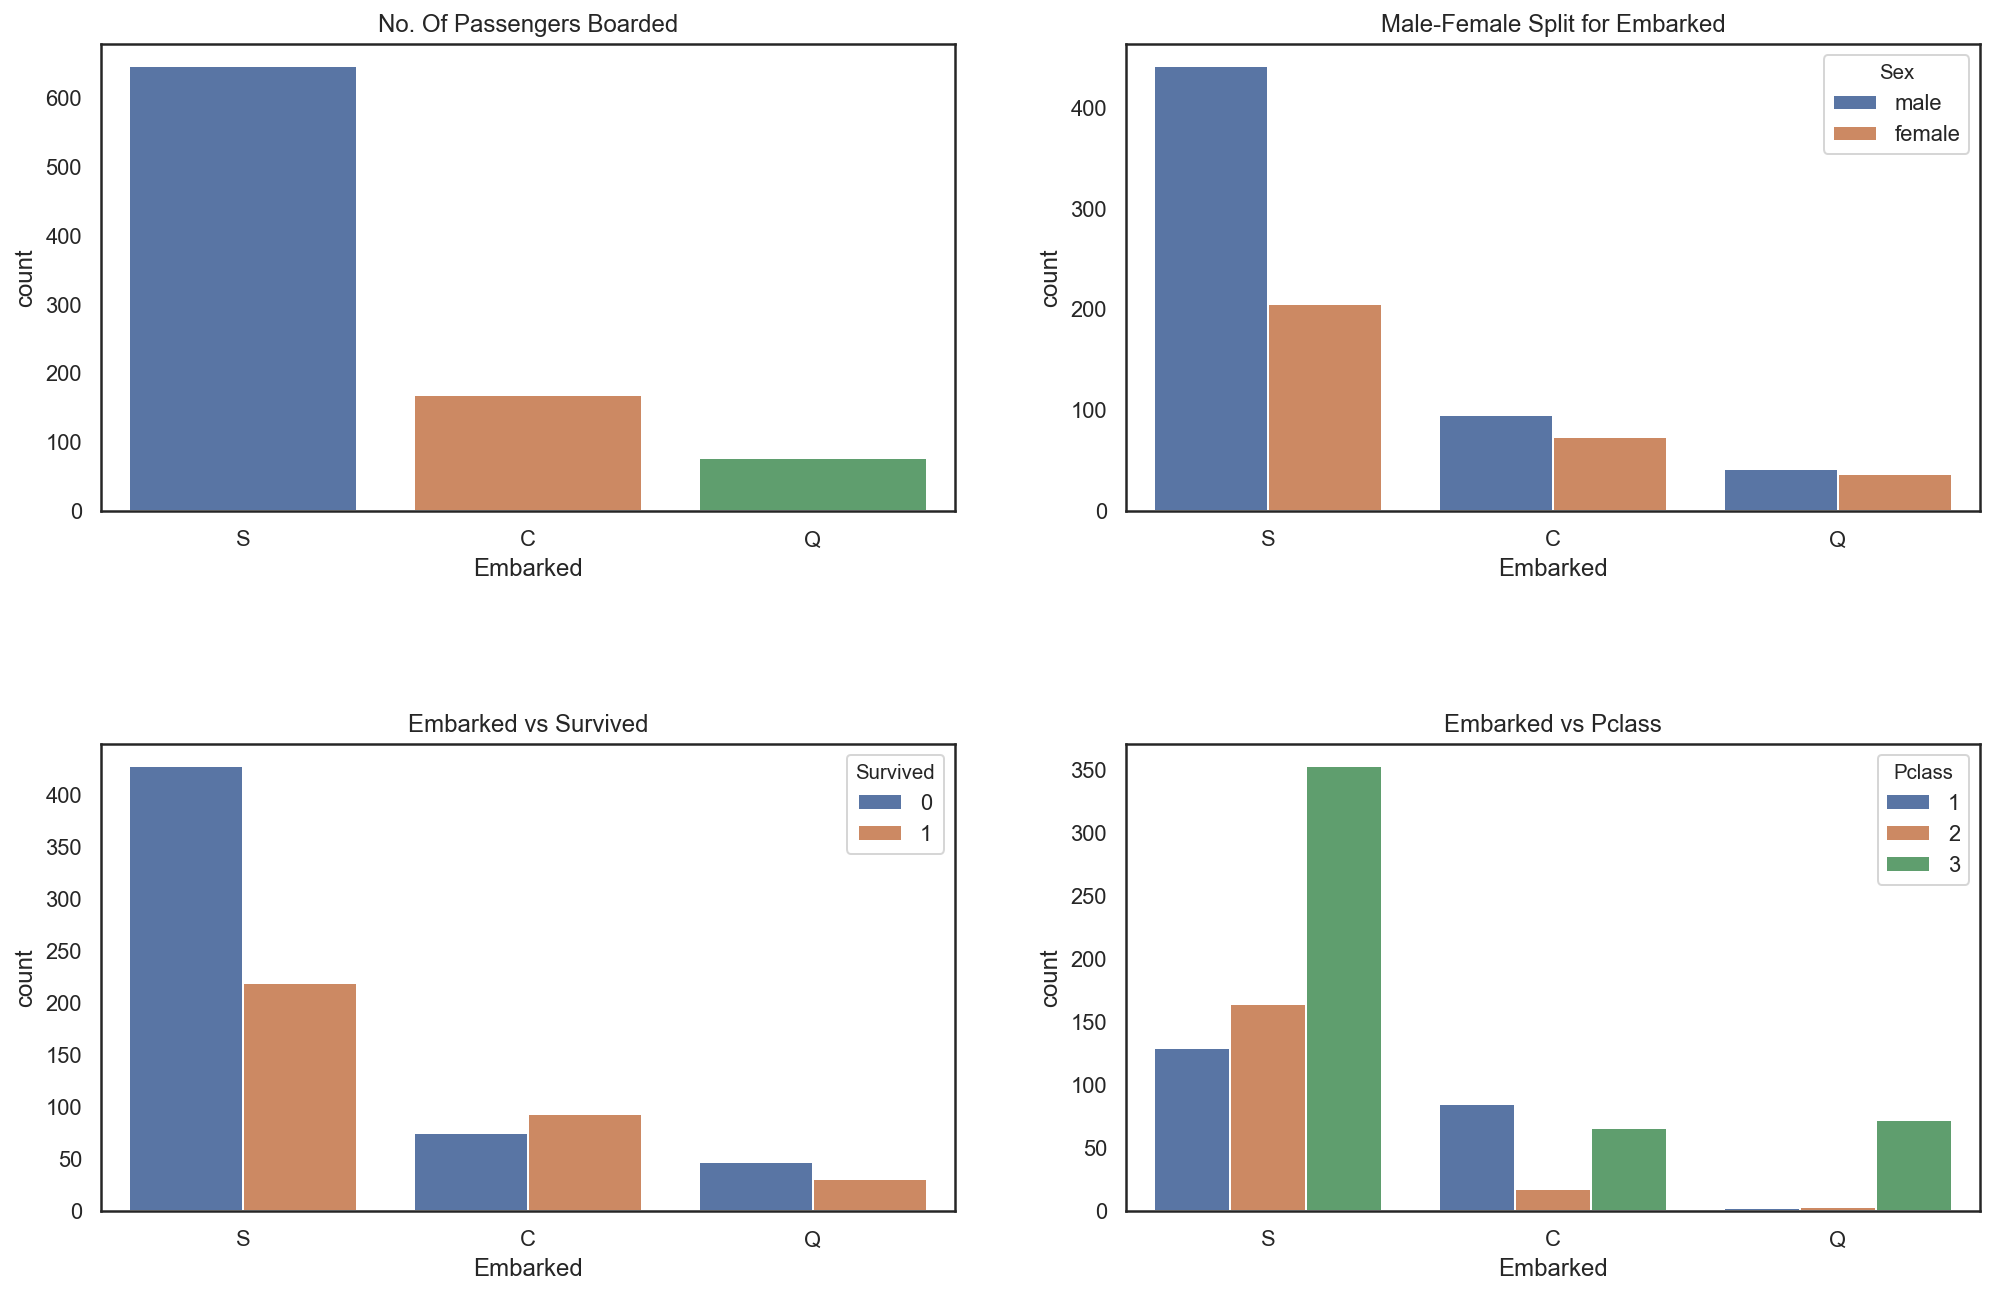

In [224]:
sns.set(style="white")
fig ,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


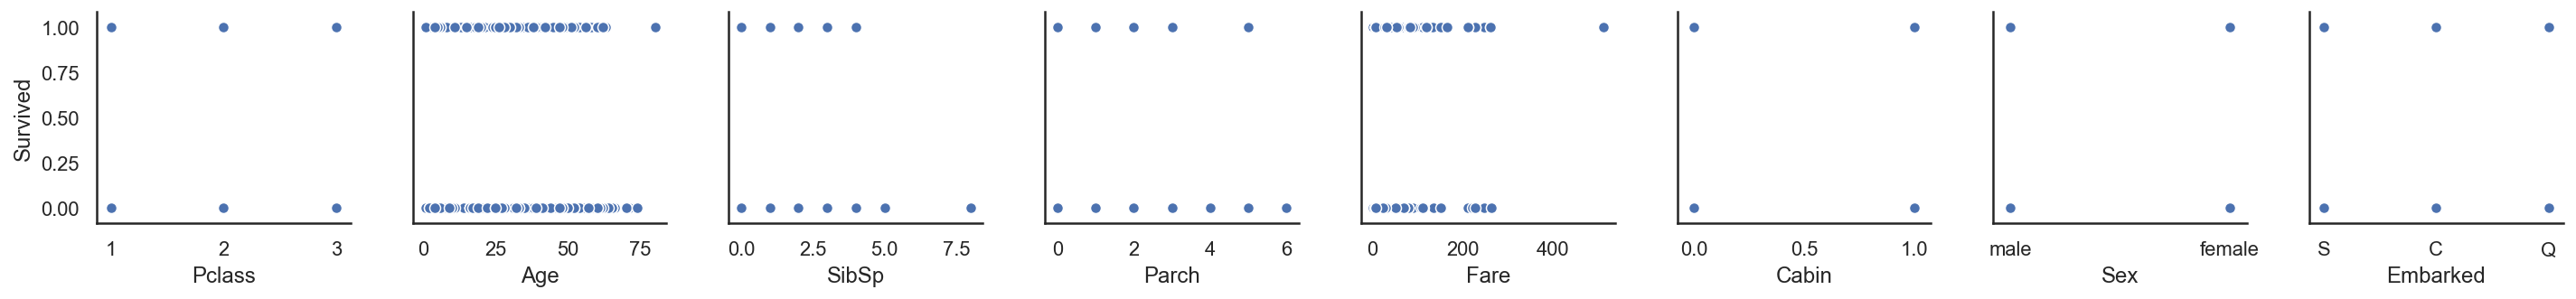

In [191]:

sns.set(style="white")
sns.pairplot(train,x_vars=[  'Pclass',  'Age', 'SibSp', 'Parch',
     'Fare', 'Cabin', 'Sex', 'Embarked']
      ,y_vars='Survived')

### Pclass, Sex & Embarked vs. Survival

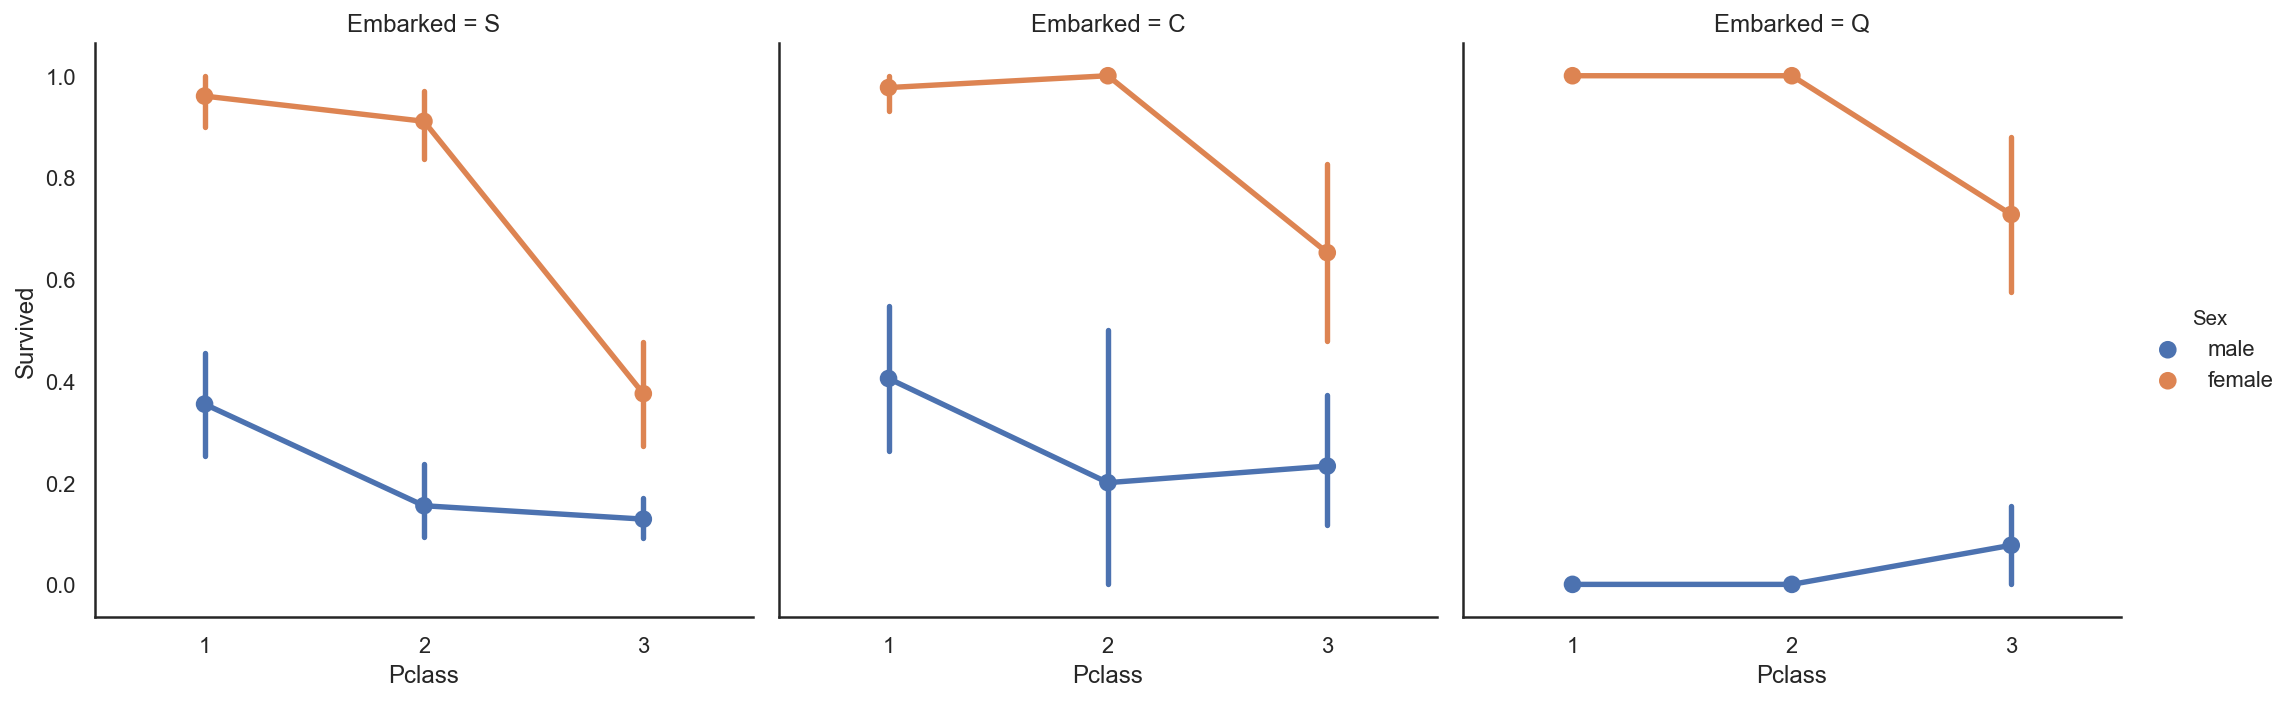

In [190]:
sns.set(style="white")
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

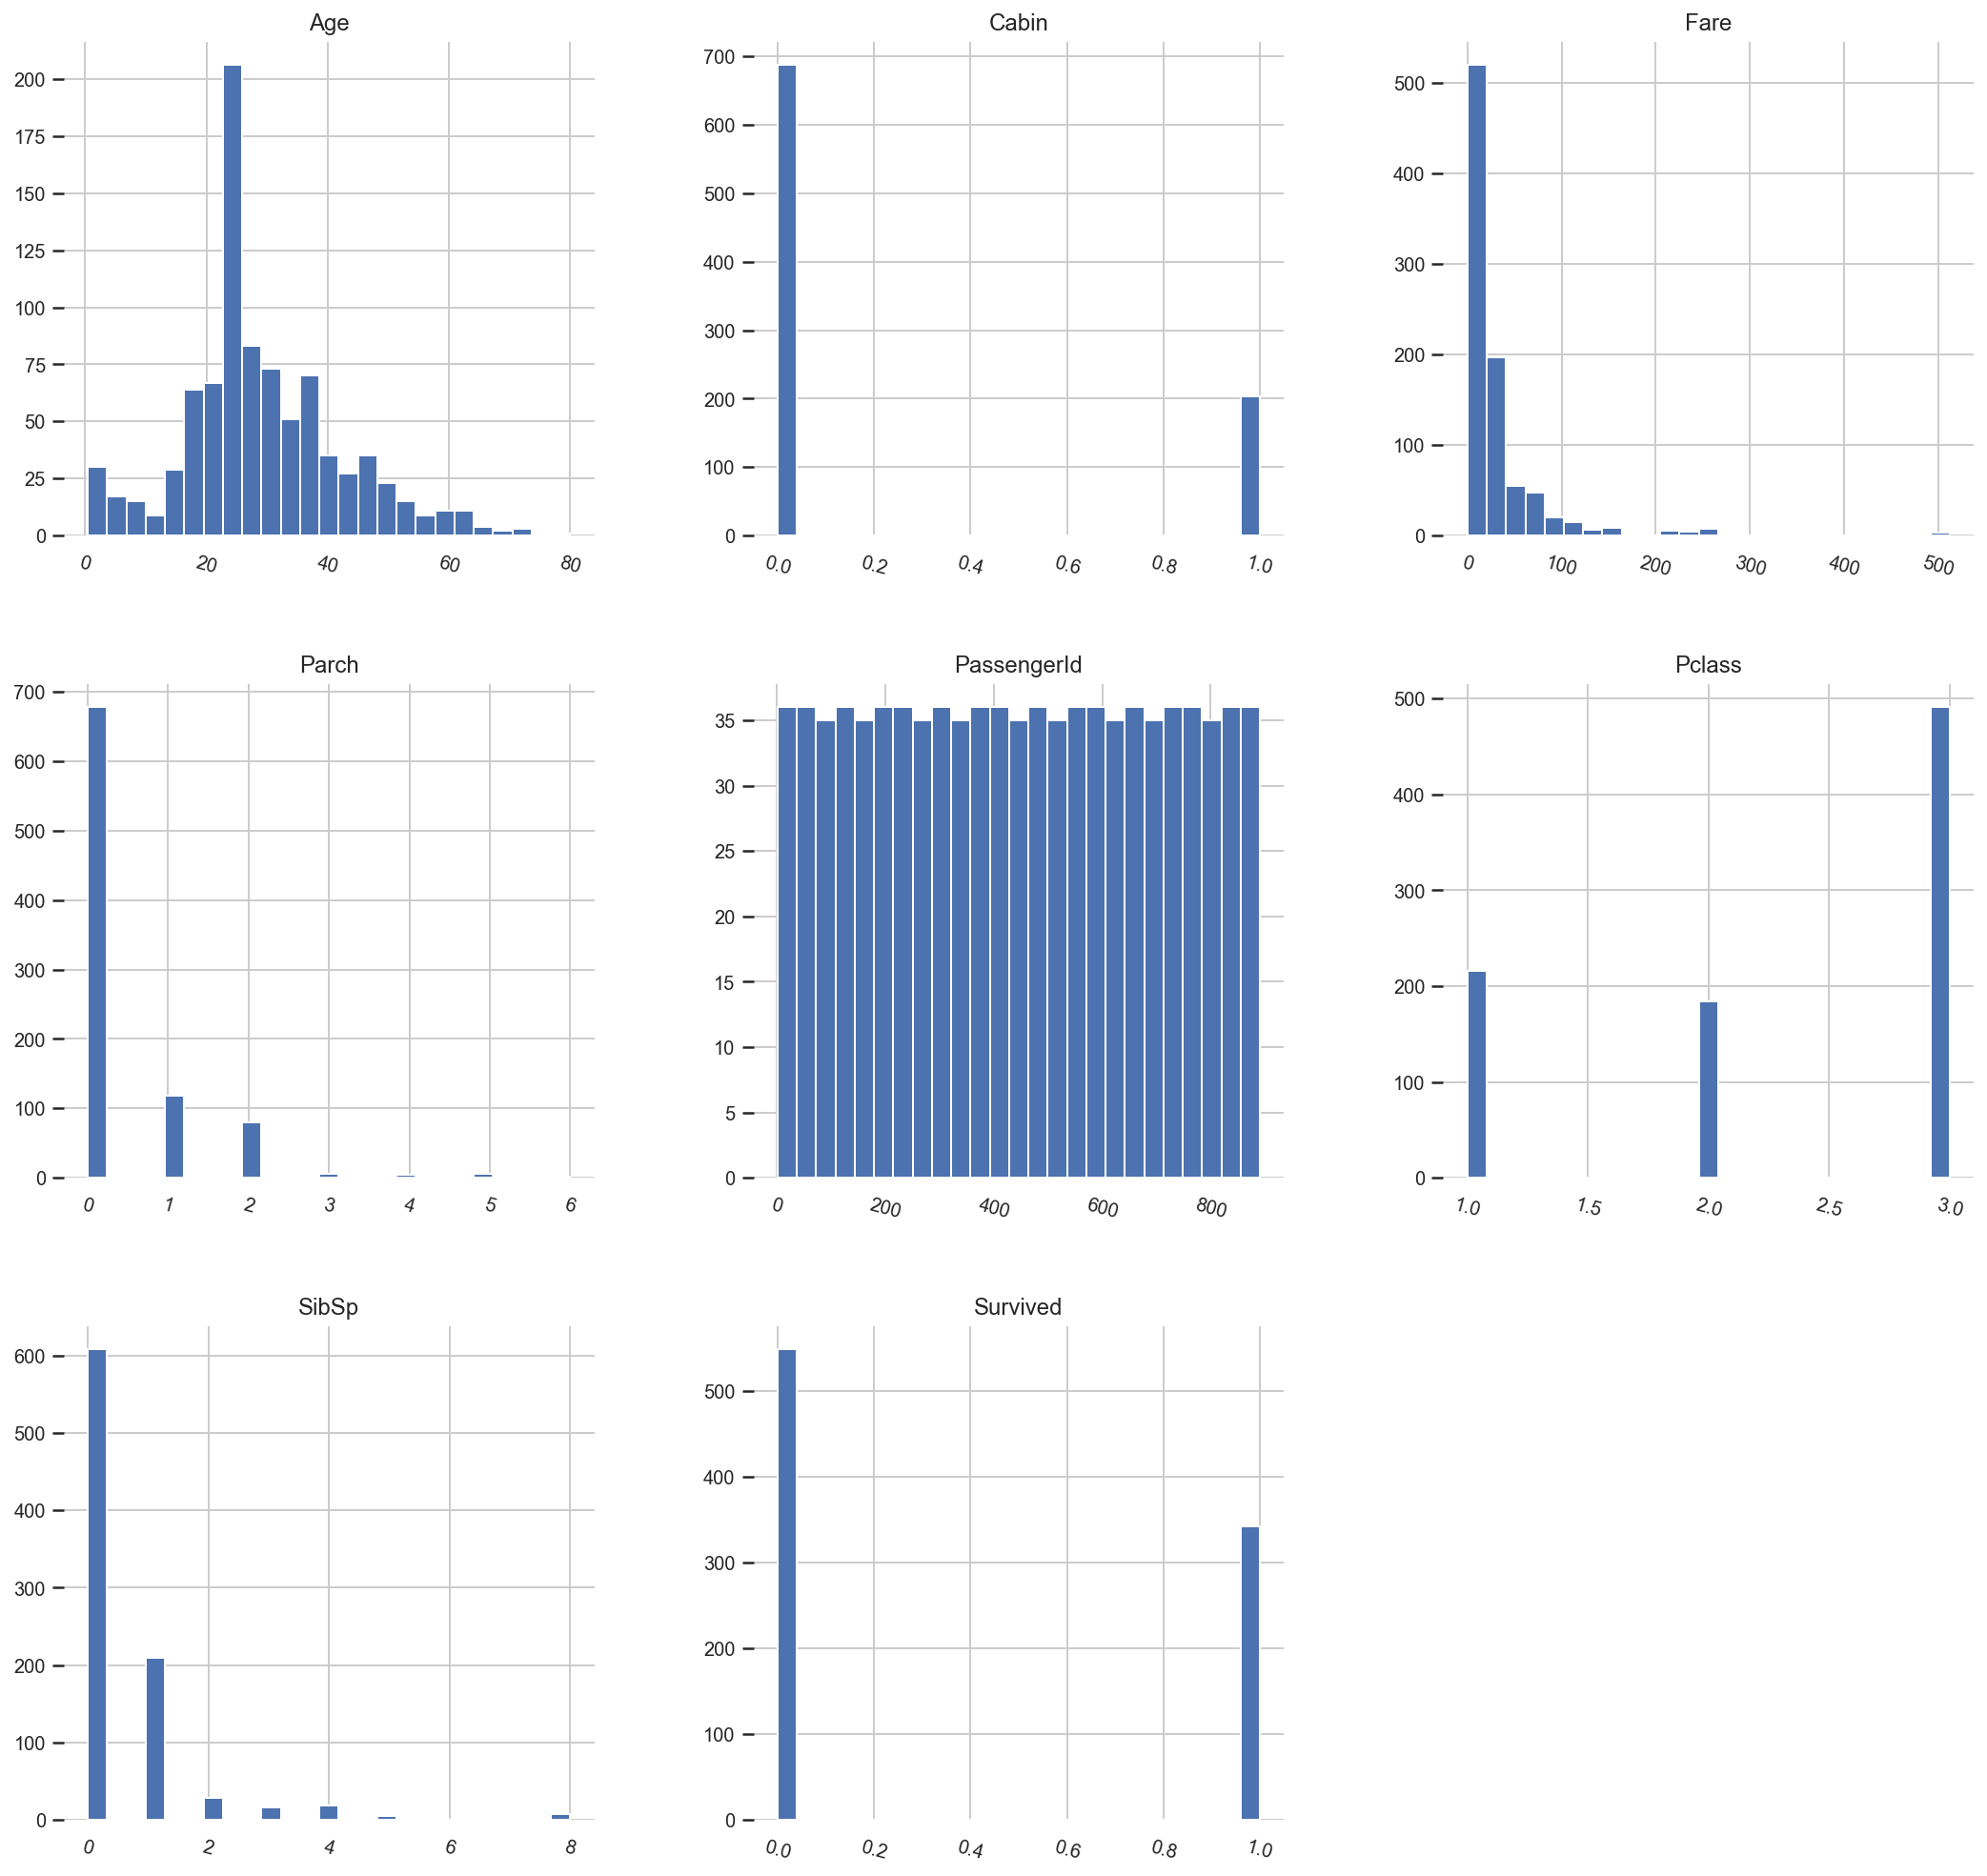

In [189]:
sns.set(style="white")
h=train.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

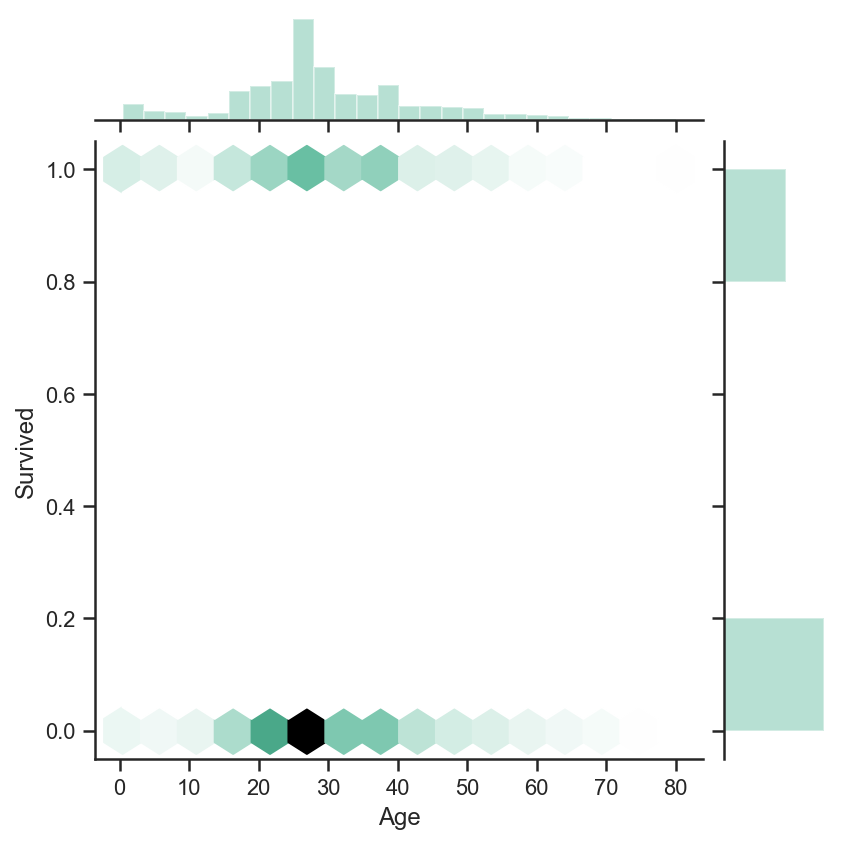

In [132]:

sns.set(style="ticks")
sns.jointplot(data=train,x='Age', y='Survived', kind="hex", color="#4CB391")


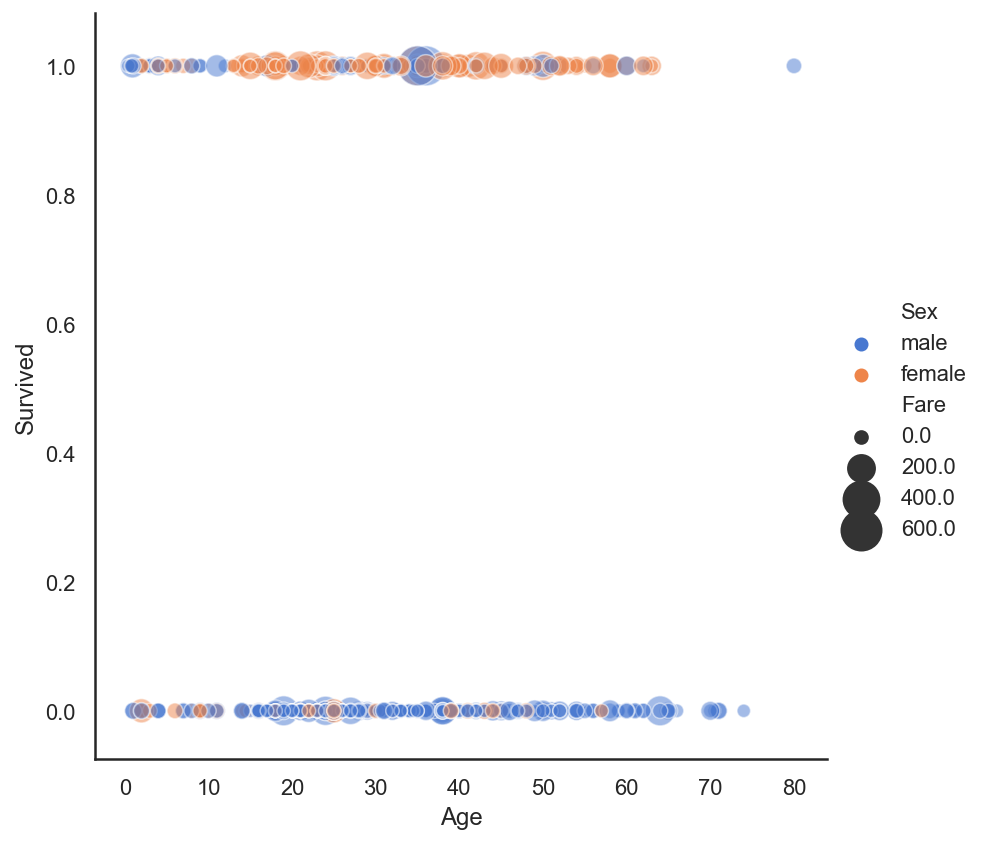

In [188]:
sns.set(style="white")
sns.relplot(x="Age", y="Survived", hue="Sex", size="Fare",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=train)

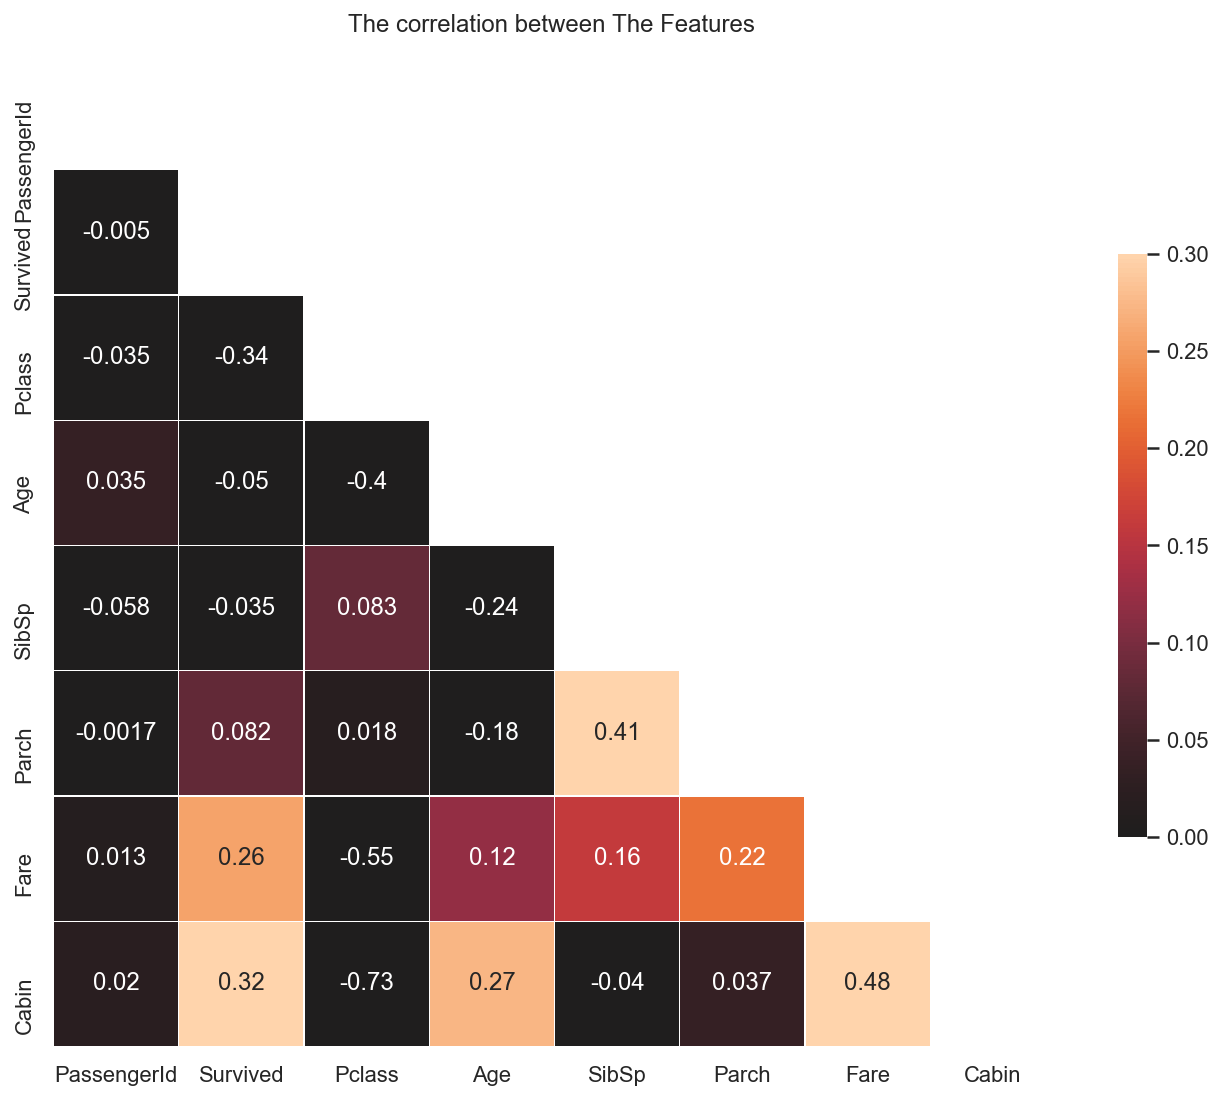

In [219]:
sns.set(style="white")
mask = np.zeros_like(train.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
sns.heatmap(train.corr(), annot=True,ax=ax,mask=mask,linecolor='w',vmin =0, vmax =.3,center=0,
            square=True, linewidths=.2,cbar_kws={"shrink": .5})
ax.set_title('The correlation between The Features ')
plt.show()

In [252]:
test = pd.get_dummies(test, columns=['Sex','Embarked'],drop_first=True)
train = pd.get_dummies(train, columns=['Sex','Embarked'],drop_first=True)

In [253]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,1


Text(0.5, 1, 'The correlation between The Features ')

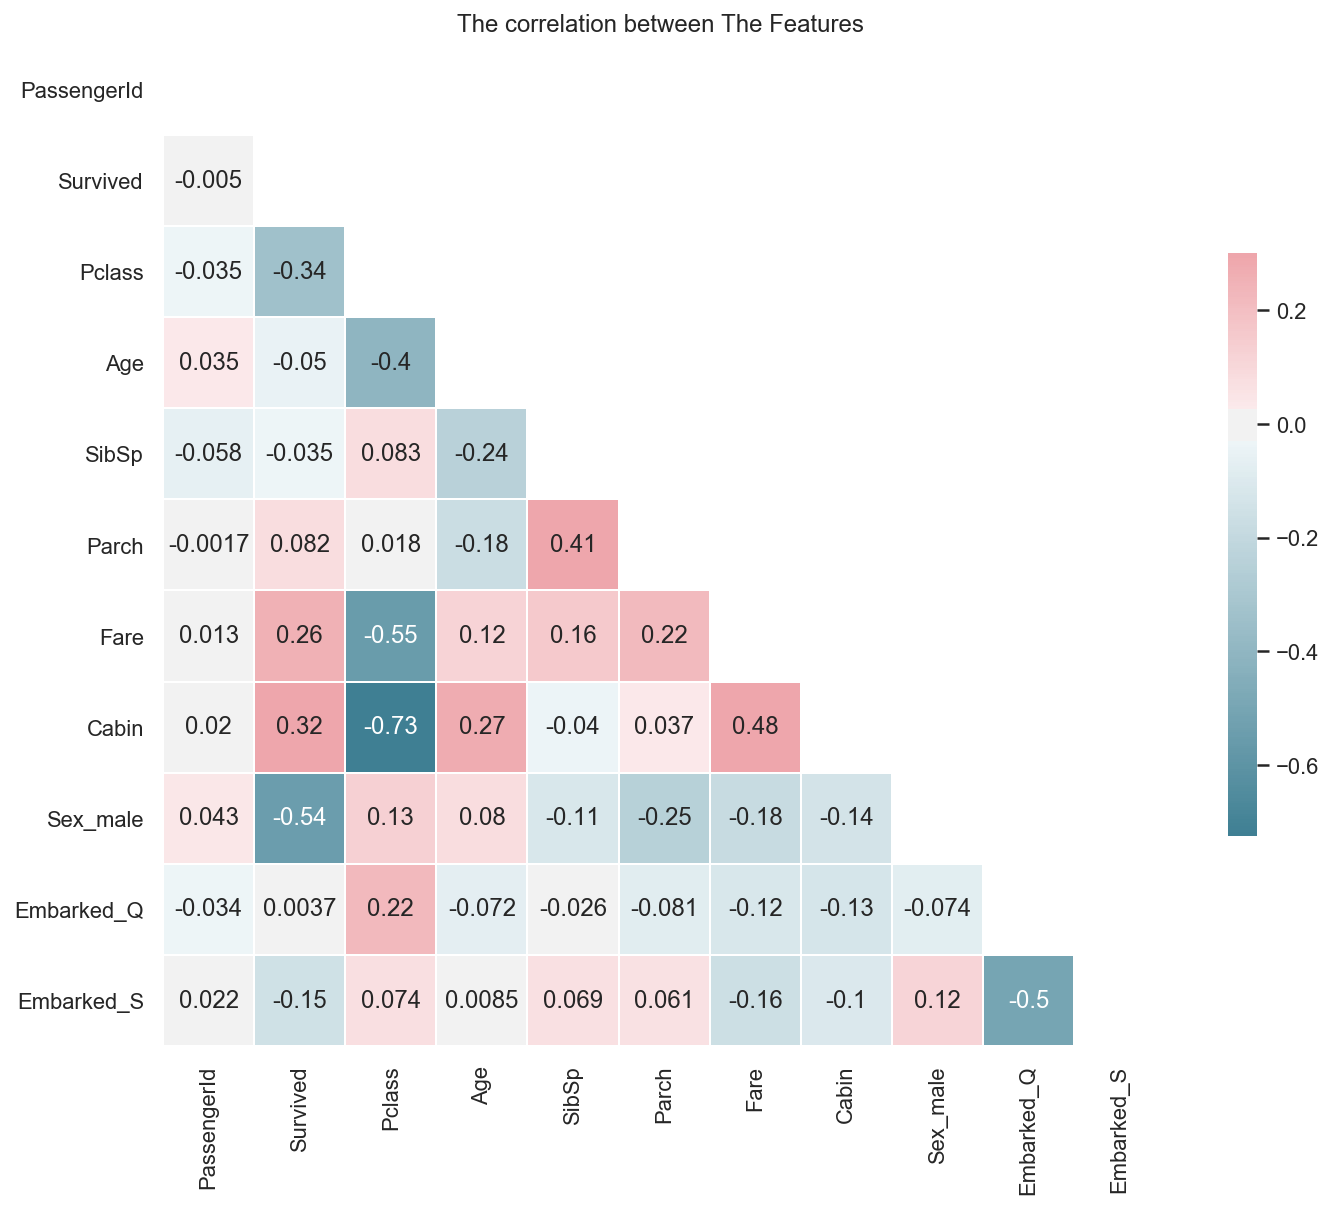

In [154]:
mask = np.zeros_like(train.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), annot=True,ax=ax,mask=mask,vmax=.3, center=0,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('The correlation between The Features ')

## Model Prep: Create `X` and `y` variables

In [281]:

features_drop = ['PassengerId','Name', 'Ticket', 'Survived']

In [282]:
# grab the selected features
selected_features = [x for x in train.columns if x not in features_drop]
selected_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [283]:
# separate the selected_column in X_train and Survived in y_train
X_train = train[selected_features]
y_train = train['Survived']

In [230]:
# baseline accuracy
y_train.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [285]:
# Let's evaluate the model on test data
X_test = test[selected_features]
#y_test = train['Survived']

In [313]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [316]:
random_state = 35
 
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 
              'RandomForestClassifier','ExtraTreesClassifier'
              , 'GradientBoostingClassifier','AdaBoostClassifier']

models = [ ('LogisticRegression',LogisticRegression(random_state=random_state)),
          ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=random_state)),
          ('SVC', SVC(random_state=random_state)),
          ('RandomForestClassifier',RandomForestClassifier(random_state=random_state)),
          ('ExtraTreesClassifier',ExtraTreesClassifier(random_state=random_state)),
          ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=random_state)),
          ('AdaBoostClassifier',AdaBoostClassifier(random_state=random_state))
          
         ]

model_accuracy = []
for k,model in models:
    print (k , ':')
    model.fit(X_train, y_train)
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    model_accuracy.append(accuracy)
    print(accuracy)
    print('\n')

LogisticRegression :
0.7935008211613146


DecisionTreeClassifier :
0.7879707935386608


SVC :
0.694868158481474


RandomForestClassifier :
0.8137571383937866


ExtraTreesClassifier :
0.8003244925946535


GradientBoostingClassifier :
0.8227462570754458


AdaBoostClassifier :
0.8148935717485045




In [317]:
pd.concat([pd.Series(model_names), pd.Series(model_accuracy)], axis=1).sort_values(by=1, ascending=False)

,0,1
5,GradientBoostingClassifier,0.822746
6,AdaBoostClassifier,0.814894
3,RandomForestClassifier,0.813757
4,ExtraTreesClassifier,0.800324
0,LogisticRegression,0.793501
1,DecisionTreeClassifier,0.787971
2,SVC,0.694868


In [318]:
Boosting = GradientBoostingClassifier(random_state=random_state)
Boosting.fit(X_train, y_train)
y = Boosting.predict(X_test)
accuracy = cross_val_score(Boosting, X_train, y_train, cv=5).mean()
print(accuracy)

0.8227462570754458


In [319]:
idTest = test['PassengerId']

In [320]:
pd.DataFrame({'PassengerId': idTest, 'Survived': y}).to_csv('Boosting.csv', index = False)

# Kaggle :

<p>We provide 7 kind of modeling in order to reach to best predections.</p>
<p>Boosting Classifier performs best with a cross validation score of 0.789.</p> 
<img src="image.PNG" alt="rig result" width="500" height="600">

# Conclusion :

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. We started this competition by focusing on getting a well understanding of the dataset. The EDA is detailed and many visualizations are included. Then we provide Seven kind of modeling Logistic Regression, DecisionTreeClassifier, SVC, Random Forest Classifier, ExtraTreesClassifier, Gradient Boosting Classifier, Ada Boost Classifier :
in order to reach to best predections. Gradient Boosting Classifier performs best with a score of 0.78.